In [101]:
import matplotlib.pyplot as plt

def plot_reg(logs, logN, slope, intercept):
    
    # Rysowanie punktów
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    # Rysowanie linii regresji
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title('Regresja liniowa dla wymiaru boxowego')
    plt.show()



In [102]:
import numpy as np


def hausdorff_dimension():
    slope=0
    return -slope
import numpy as np
import math
import matplotlib.pyplot as plt

def box_fractal_dimension(points, min_box_size=1, max_box_size=None, num_scales=10):

    points = np.array(points)
    

    x_min, x_max = points[:, 0].min(), points[:, 0].max()
    y_min, y_max = points[:, 1].min(), points[:, 1].max()

    if max_box_size is None:
        max_box_size = max(x_max - x_min, y_max - y_min)


    scales = np.logspace(math.log10(min_box_size), math.log10(max_box_size), num_scales)
    

    box_counts = []
    for scale in scales:

        grid_x = np.floor((points[:, 0] - x_min) / scale).astype(int)
        grid_y = np.floor((points[:, 1] - y_min) / scale).astype(int)

        unique_boxes = set(zip(grid_x, grid_y))
        box_counts.append(len(unique_boxes))


    log_scales = np.log( scales)
    log_counts = np.log(np.array(box_counts))
    log_counts=log_counts[::-1]

    slope, intercept = np.polyfit(log_scales, log_counts, 1)
    



    plot_reg(log_scales, log_counts, slope, intercept)

    return slope


In [103]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math


def jpg_to_pixel_array(image_path):
    # Otwórz obraz
    with Image.open(image_path) as img:
        # Upewnij się, że obraz jest w formacie RGB
        img = img.convert("RGBA")
        # Pobierz szerokość i wysokość obrazu
        width, height = img.size
        # Zamień obraz na tablicę pikseli
        pixel_array = []
        for y in range(height):
            row = []
            for x in range(width):
                # Pobierz kolor piksela (R, G, B)
                color = img.getpixel((x, y))
                if(color[3] < 255):
                    row.append((255 , 255 , 255))
                else:
                    row.append((color[0] , color[1] , color[2]))
            pixel_array.append(row)
        return pixel_array

def plot_image_from_pixels(pixel_array):
    # Konwertuj tablicę pikseli do formatu odpowiedniego dla matplotlib
    #height = len(pixel_array)
    #width = len(pixel_array[0])
    # Stwórz numpy array dla efektywności
    import numpy as np
    image_data = np.array(pixel_array, dtype=np.uint8)
    # Wyświetl obraz
    plt.imshow(image_data)
    plt.axis('off')  # Ukryj osie
    plt.show()

def make_points_array_from_black(pixel_array):
    height = len(pixel_array)
    width = len(pixel_array[0])

    print(height , width)
    
    points_list = []

    #points_list.append(((width - width % 2) / 2 , (height - height % 2) / 2))

    for i in range(height):
        for j in range(width):
            if(pixel_array[i][j] == (0 , 0 , 0)):
                points_list.append((width - j , height - i))

    #print(len(points_list))
    return(np.array(points_list))


def generate_cantor_set(N , n, start=0.0, end=1.0):
    points_list = []
    width = 1000
    thickness = 10
    if(n == 0):
        return points_list
    else:
        n_start = math.floor(start * width)
        n_end = math.floor(end * width)
        for i in range(n_start , n_end):
            for j in range(n * 2 * thickness , n * 2 * thickness + thickness):
                points_list.append((i , j))

        segment_length = (end - start) / 3.0
        left_segment = (start, start + segment_length)
        right_segment = (start + 2 * segment_length, end)

        left_points = generate_cantor_set(N , n - 1, *left_segment)

        right_points = generate_cantor_set(N , n - 1, *right_segment)
        
        points_list = points_list + left_points
        points_list = points_list + right_points

        return points_list
    



def plot_points_only(points):
    """
    Funkcja rysuje wykres na podstawie tablicy punktów bez linii łączących i bez osi.
    
    :param points: Lista punktów w formie [(x1, y1), (x2, y2), ...]
    """
    # Rozdziel punkty na osobne listy współrzędnych x i y
    x_coords, y_coords = zip(*points)
    
    # Tworzenie wykresu
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='black', s=0.1, label='Punkty')  # Użycie scatter do rysowania punktów
    plt.axis('off')  # Wyłącz osie
    plt.show()



880 1000


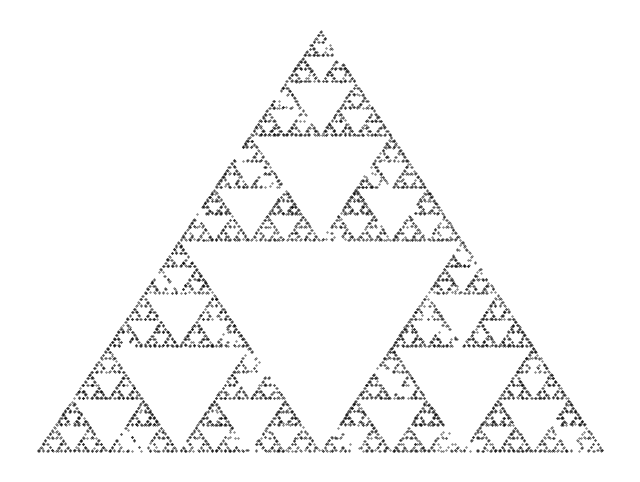

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125]


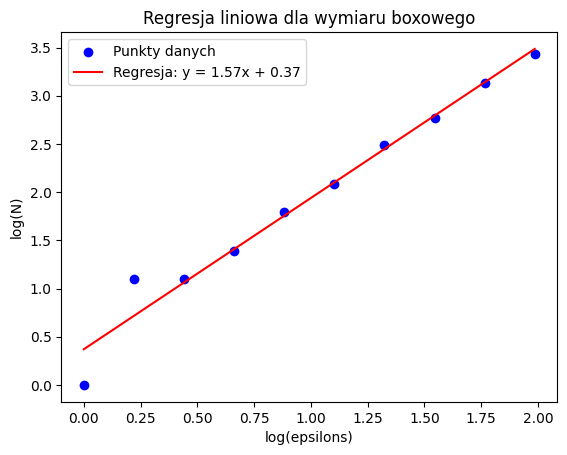

np.float64(1.5690550076285315)

In [104]:

image_path = "./triangle.jpg"   # Podaj ścieżkę do pliku JPG
pixel_array = jpg_to_pixel_array(image_path)


# punkty z obrazka
points = make_points_array_from_black(pixel_array)
plot_points_only(points)
# punkty z generowania cantora
points_list = generate_cantor_set(6 , 6)
points_2 = np.array(points_list)

# Tu jak chcesz wyświtlić obrazek z punktów
#plot_points_only(points)
points=points/120


epsilons = []
for i in range(12):
    epsilons = epsilons + [1/(2**i)]
print(epsilons)
n = points.shape[0]


box_fractal_dimension(points,max_box_size=None)
